In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import gmaps
import requests
import json
from scipy.stats import linregress

In [35]:
#Original Draft Data

master_data = pd.read_csv("../Draft-Research/Draft_SD_CSV.csv")

#Creating WAR Group column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
#Only showing draft classes that have had players debut before 2014

working_data = master_data.loc[master_data["Year"] < 2005]

#Only includes signed draftees

signing_data = working_data.loc[working_data["Signed"] == "Y"]

In [38]:
#Create a table by year and WAR groups

draft_year_war_table = pd.crosstab(working_data["Year"], working_data["WAR Group"])
draft_year_war_table = draft_year_war_table[["No Major League Experience", "Less than 5 WAR", "10-15 WAR", "15-20 WAR", "20-25 WAR", "More than 25 WAR"]]

draft_year_war_table

WAR Group,No Major League Experience,Less than 5 WAR,10-15 WAR,15-20 WAR,20-25 WAR,More than 25 WAR
Year,,,,,,
1965,686,108,7,5,2,5
1966,727,76,6,3,2,2
1967,890,60,8,5,2,4
1968,809,74,7,7,1,1
1969,917,98,5,8,2,2
1970,826,80,6,5,0,3
1971,699,83,2,0,2,5
1972,668,90,8,7,5,4
1973,646,71,4,7,3,3


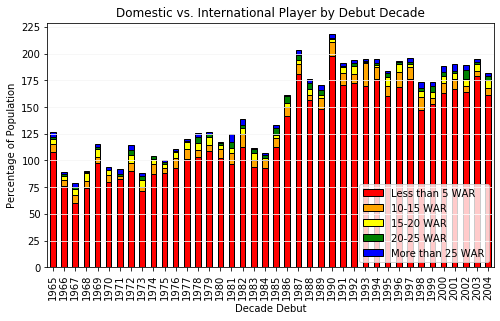

In [32]:
#Creating a bar chart for players by WAR group
